# Propuesta de arquitectura para implementación de compra a crédito en sucursales de Farmacias Guadalajara

## Proceso
Se requiere un proceso en el cual Prixz pueda comprar en cualquier sucursal de Farmacias Guadalajara y que a los repartidores asignados se les entregue el pedido generado en las sucursales correspientes sin necesidad de que el repartidor o el empleado de la sucursal tengan que utilizar medios análogos que retrasen el proceso de compra

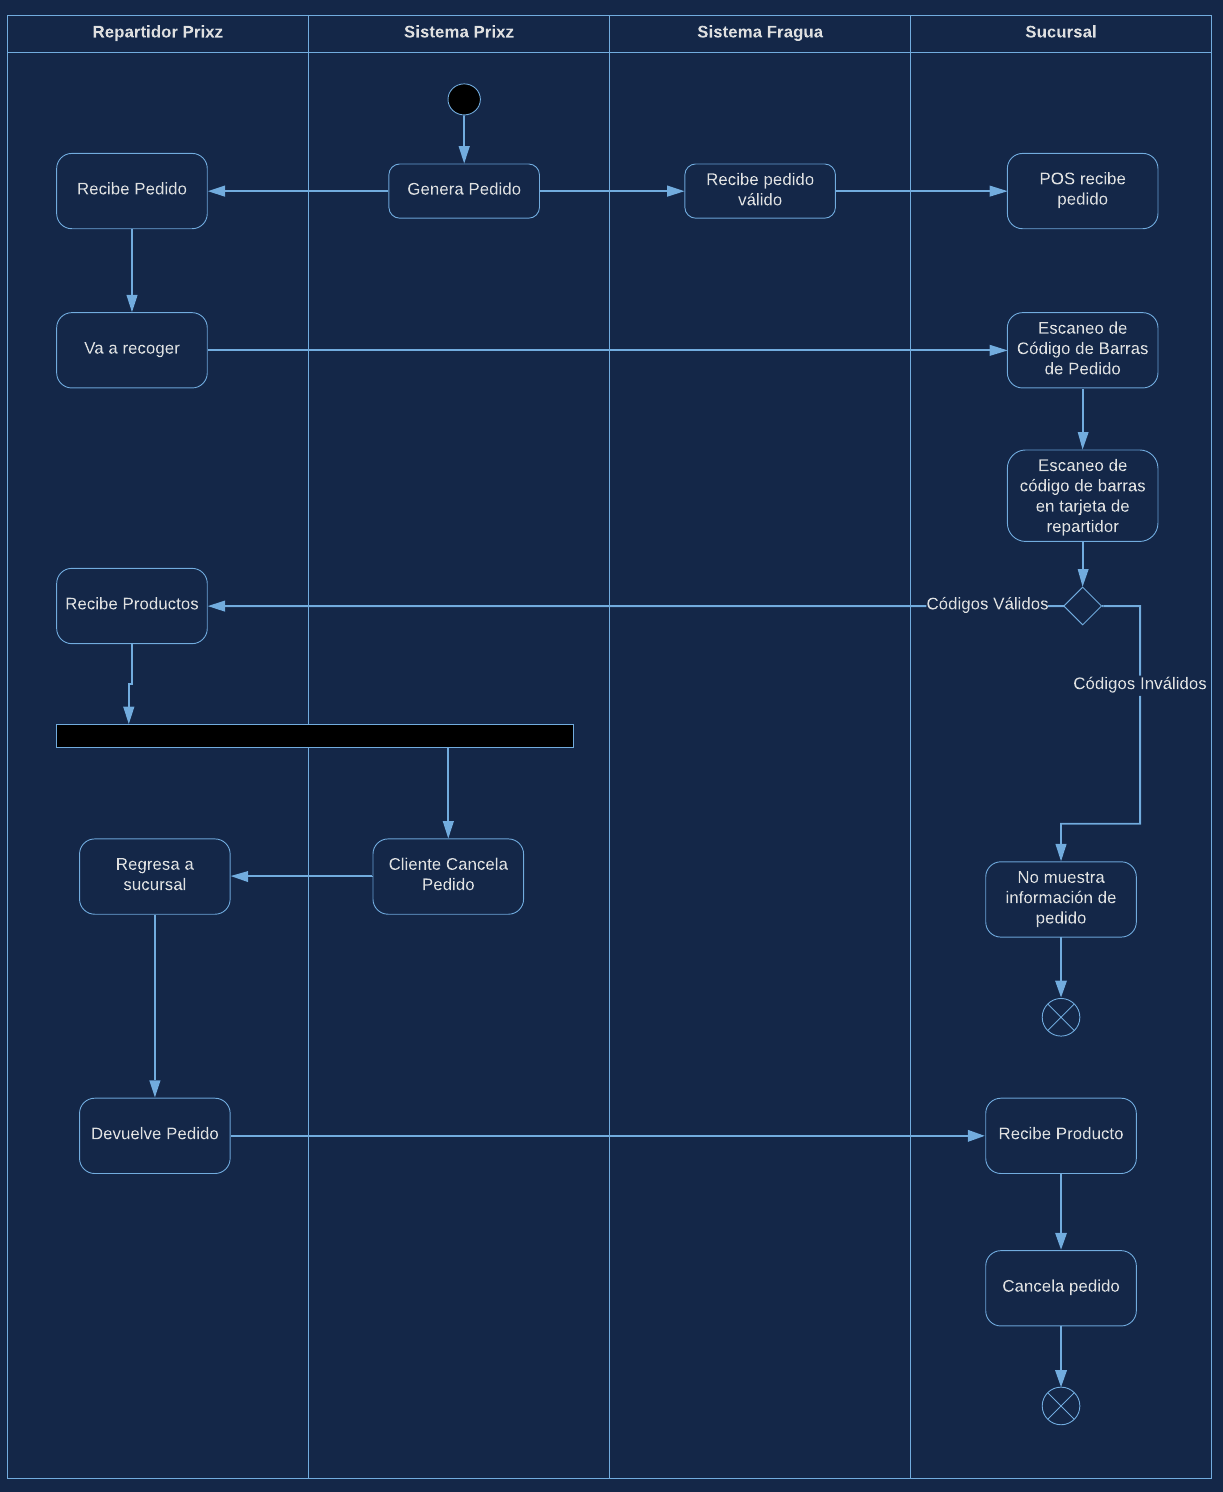

In [1]:
from IPython.display import Image
Image(filename='assets/diagram.png',width=800, height=400)

## Generación de Códigos
Durante el proceso de requiere verificar la identidad del repartidor, así como la no-duplicidad del pedido. Por lo que el pedido irá acompañado de un identificador numérico de 12 dígitos representado gráficamente con un código de barras. Así mismo el repartidor contará con una tarjeta, física o digital (En el teléfono) con otro identificador numérico de 12 dígitos representado, del mismo modo, por un código de barras.

Tanto el identificador numérico del repartidor, como el identificador del pedido estarán encriptados de manera tal que la POS pueda comprobar su validez utilizando un algoritmo de encriptación definido.

Al servicio proporicionado por fragua se enviarán ambos códigos para ser validados al momento de consultar el pedido, para dicho fin se proporcionarán las llaves y métodos de encripción correspondientes a cada código como se describe a continuación:

## Código de pedido
El código de pedido estará dividido en 2 grupos. Los primeros 4 caracteres son el Grupo 1 y los 7 restantes el Grupo2. El primero grupo contendrá 2 datos: El número de día del año correspondiente al día en el que el pedido fue **generado** y un dígito de control como se muestra a continuación

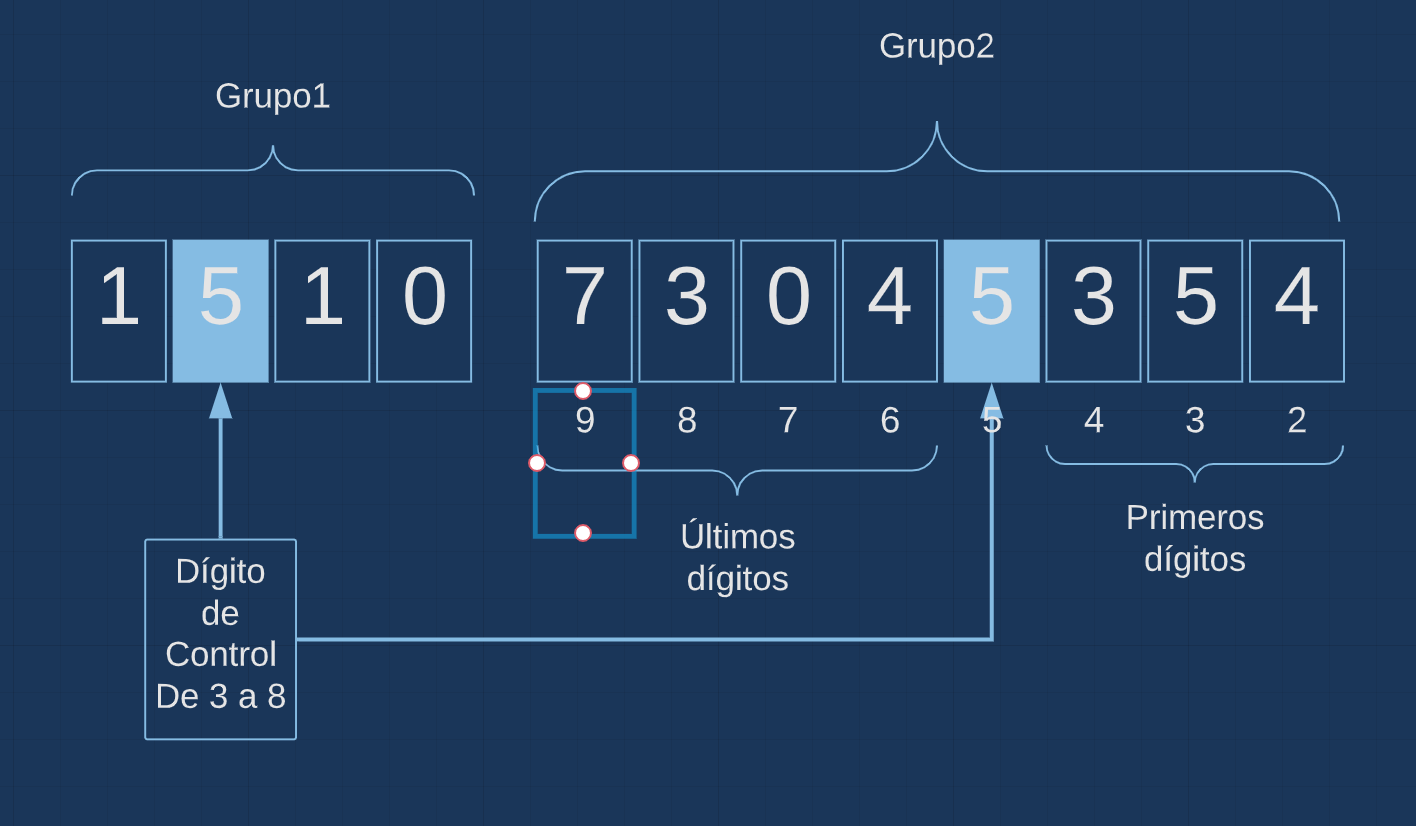

In [2]:
from IPython.display import Image
Image(filename='assets/encryption.png',width=800, height=400)

Como se puede ver en la imagen, el dígito de control será un *número aleatorio entre 3 y 8* que indicará la posición bloqueada del segundo grupo, que contendrá el mismo dígito. En el caso de la imagen, el dígito de control es el *5*, por lo que se toma la posición 5 de derecha a izquierda, empezando por el 2.

Lo anterior provoca que el grupo 2 se encuentre separado en 2 secciones. La sección de la izquierda contendrán los últimos dígitos del código generado, y la de la derecha contendrá los primeros.

El código generado utilizará el siguiente algoritmo:

Fecha actual en milisegundos dese [epoch](https://en.wikipedia.org/wiki/Unix_time) es un dígito de 13 caracteres. De dicho dígito se descartarán los primeros 4 y los últimos 2 dígitos, quedando así un identificador de 7 dígitos que se distribuirá en las 2 secciones en las que se dividió el grupo 2.

El siguiente código muestra la generación de un código único utilizando el momento actual:

In [3]:
import datetime
from random import seed
from random import randint
#Dígito de Control
control_digit=randint(3,8)

#Generación de primer grupo
def firstGroup(cd):
    #Fecha actual exacta
    now=datetime.datetime.now()
    #Primer día de éste año
    newyear=datetime.datetime(now.year,1,1)
    #Días transcurridos desde primer día del año más uno (Día del año)
    nday=str((now-newyear).days+1)
    print("Día del año:",nday)
    #Se convierte a lista
    r=list(nday)
    #Se inserta el código de control en la segunda posición
    r.insert(1,cd)
    #La lista se convierte a cadenas de texto y se devuelven los datos
    return "".join(str(i) for i in r)

#Generación del segundo grupo
def secondGroup(cd):
    code=list(str(round(datetime.datetime.now().timestamp()*1000)))[4:11]
    print("Código basado en fecha actual:","".join(str(j) for j in code))
    full=code[-(9-cd):]+[cd]+code[:-(9-cd)]
    return "".join(str(k) for k in full)

print("Dígito Verificador:",control_digit)
firstGroup(control_digit)+secondGroup(control_digit)

Dígito Verificador: 8
Día del año: 111
Código basado en fecha actual: 3597622


'181128359762'

Un código generado se puede validar extrayendo el día del año y el código basado en fecha y revisar si corresponden